# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
#it sets the backend of matplotlib to the "inline" backend, which means that the plots will be displayed directly in the output cells of the notebook
matplotlib.rcParams['figure.figsize'] = (12,8) #to adjust the the configuration of the plots we will create


# Read the dataset

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Exploratory data analysis 

In [3]:
# Percentage of missing data
for col in df.columns:
    per_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(per_missing*100, 2)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


'budget' has 28.31% of missing values. There are other columns with missing values but only a few. There are many ways of handling missing data, but since it could be a time-consuming task and we want to move further with the analysis, I'll just drop all the rows with missing values:

In [4]:
df = df.dropna()
for col in df.columns:
    per_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(per_missing*100, 2)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


No missing values. Let's keep analysing.

In [5]:
# Data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

By looking at the columns, I see no need of having 'budget', 'votes', and 'gross' as a float64 type, so I'll loop through them and covert them to int64 type.

In [6]:
columns_to_convert = ['budget', 'votes', 'gross']

for column in columns_to_convert:
    df[column] = df[column].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

Now, another thing we should handle, is the fact that 'year' and 'released' not always match (the year should be the same, as explained in the dataset website). So we will extract the year from the 'released' column and creat a new one, called 'year_correct':

In [7]:
df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


I'll sort the columns by gross revenue and see if there's a patterns in terms of budget/gross

In [8]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


Just as expected, there's a tendency: the higher the budget, the higher the gross revenue. But we are going to explore what are the things correlated to 'gross' revenue.<br><br>
Although it would be best to analyse every single columnn vs 'gross', there are a few features that might have more influence in it, so we will proceed to analyse those specific features instead of all of them.

The features that I think will be more correlated to 'gross' are:
- 'budget'
- 'company'

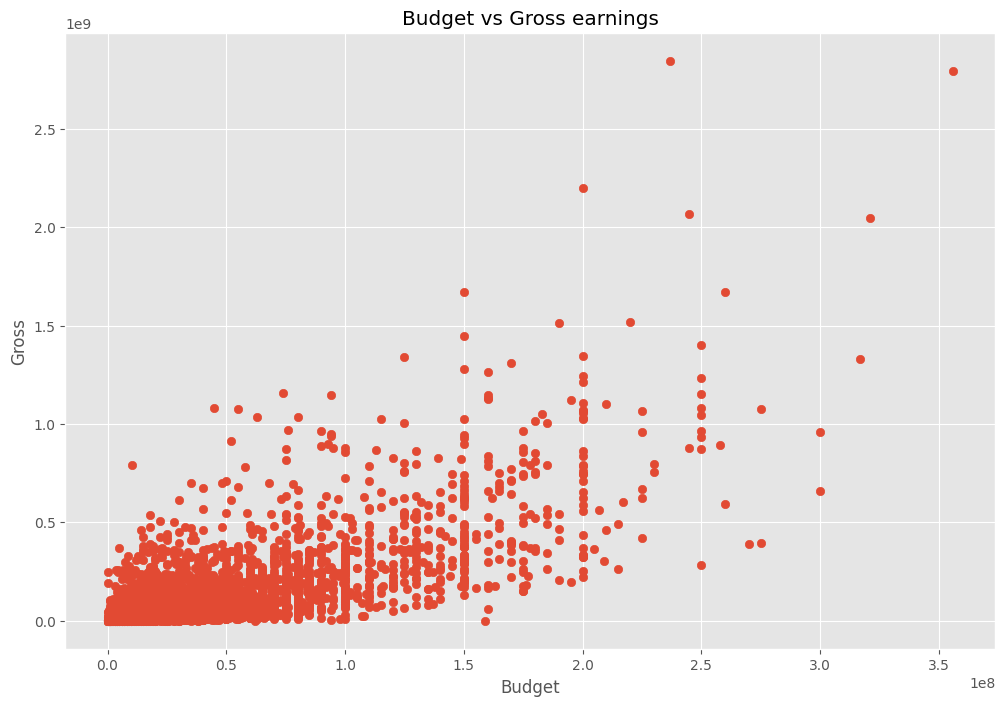

In [9]:
# plot 'budget' vs. 'gross'

plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross earnings')
plt.show()

Text(0.5, 1.0, 'Budget vs Gross')

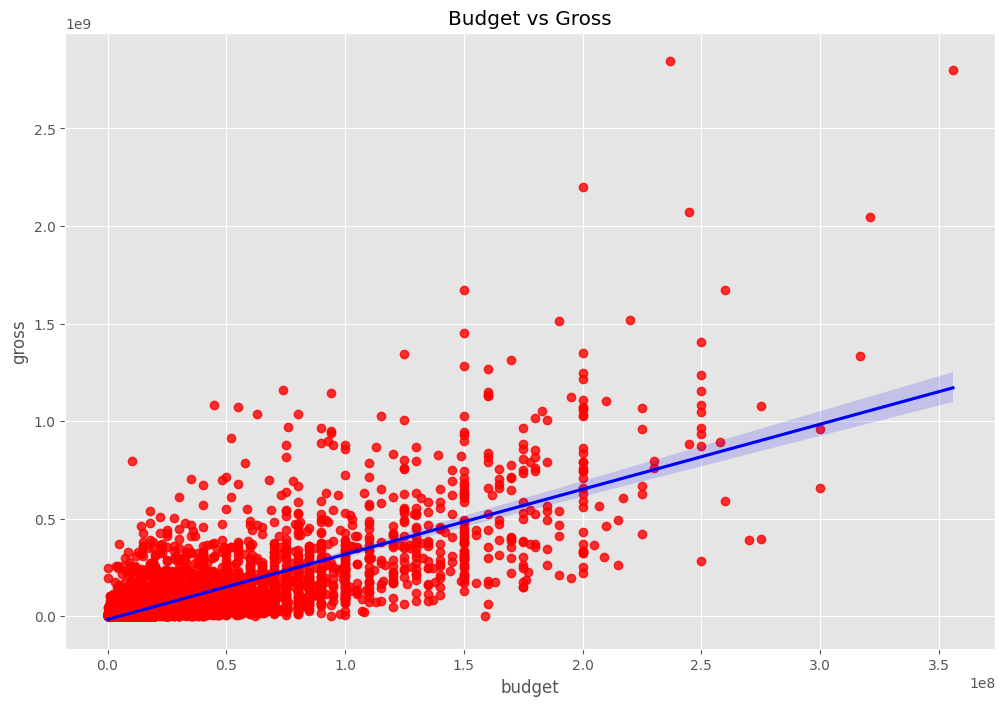

In [10]:
# Plot using seaborn, that provides a more concise way to create a scatter plot with a regression line

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Budget vs Gross')

There's seem to be a correlation. We can have a look at how correlated the categories are (this will only include numerical fields, categorical ones will be analysed later).

In [13]:
df.corr(method='pearson', numeric_only = True) #standard correlation coefficient

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [14]:
df.corr(method='kendall', numeric_only = True) #Kendall Tau correlation coefficient

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
year_correct,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [15]:
 df.corr(method='spearman', numeric_only = True) #Spearman rank correlation

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
year_correct,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


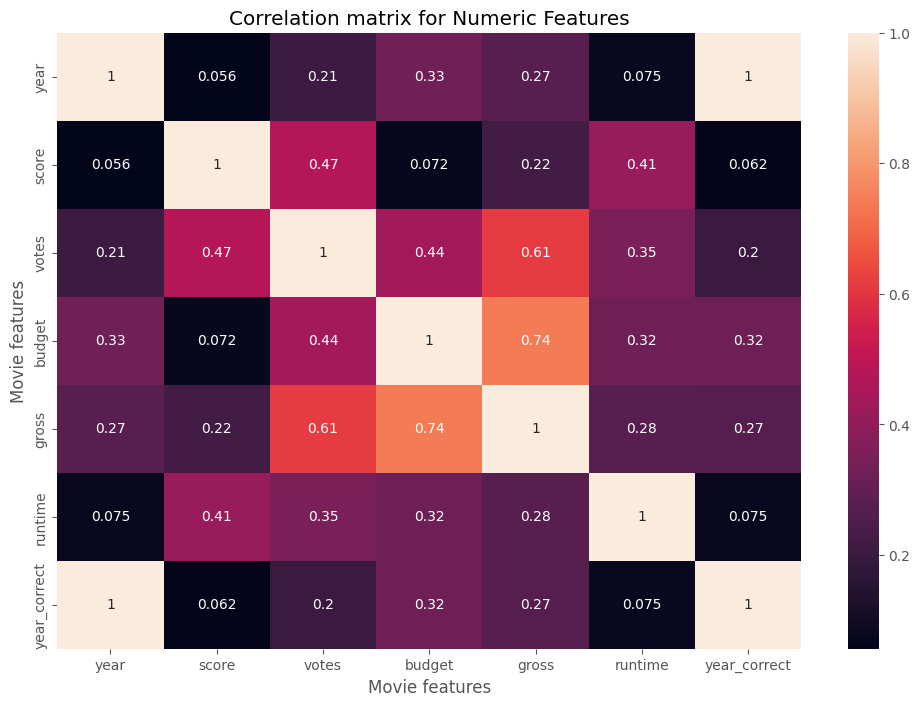

In [17]:
correlation_matrix = df.corr(method='pearson', numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

There's a high correlation between 'gross' and 'budget'. Also, 'votes' has a big influence, considering that the more votes a movie has, means more people watched it, and it translates directly to more 'gross' revenue.

Now, to address the non-numerical features, we are going to assign a numeric value for each unique categorical value:

In [23]:
df_factorized = df.copy()

object_cols = df_factorized.select_dtypes(include='object').columns
df_factorized[object_cols] = df_factorized[object_cols].apply(lambda x: pd.factorize(x)[0])

df_factorized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,0,0,0,1980,0,8.4,927000,0,0,0,0,19000000,46998772,0,146.0,1980
1,1,0,1,1980,1,5.8,65000,1,1,1,1,4500000,58853106,1,104.0,1980
2,2,1,2,1980,2,8.7,1200000,2,2,2,1,18000000,538375067,2,124.0,1980
3,3,1,3,1980,1,7.7,221000,3,3,3,1,3500000,83453539,3,88.0,1980
4,4,0,3,1980,3,7.3,108000,4,4,4,1,6000000,39846344,4,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,5331,0,2,2020,2541,6.6,140000,2059,2509,624,1,90000000,426505244,1,124.0,2020
7649,5332,1,2,2020,2557,6.5,102000,2060,3203,1843,1,85000000,319715683,3,99.0,2020
7650,5333,1,1,2020,2541,5.6,53000,1177,1875,426,1,175000000,245487753,5,101.0,2020
7651,5334,1,1,2020,2558,6.8,42000,2061,3042,37,4,135000000,111105497,1473,100.0,2020


In [24]:
corr_matrix = df_factorized.corr(method='pearson')

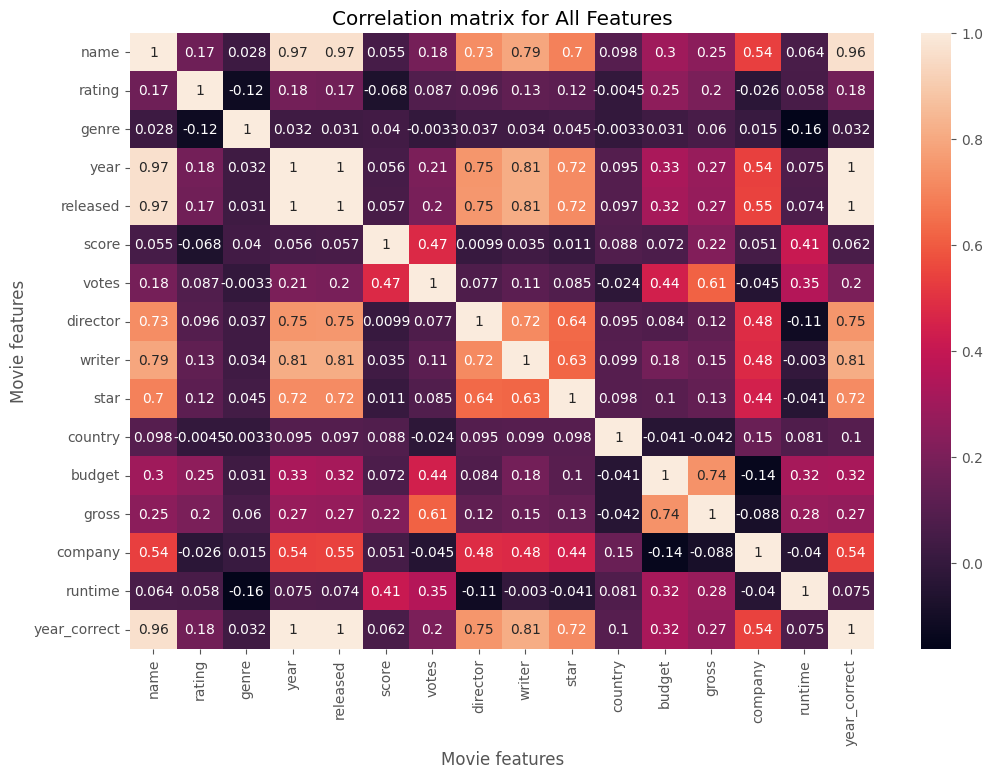

In [25]:
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation matrix for All Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

By a quick skim, it;s possible to see that budget has the bigger effect on gross revenue.

In [39]:
unstacked = corr_matrix.unstack()
for idx, value in unstacked.items():
    print(idx, value)

('name', 'name') 1.0
('name', 'rating') 0.16980774341353633
('name', 'genre') 0.02841318831133063
('name', 'year') 0.9654608656684037
('name', 'released') 0.9660864894306278
('name', 'score') 0.05499897948835201
('name', 'votes') 0.18465031995854111
('name', 'director') 0.7254106292526009
('name', 'writer') 0.7918722089788695
('name', 'star') 0.6951243478393716
('name', 'country') 0.0981096481680645
('name', 'budget') 0.29804935656079623
('name', 'gross') 0.24630823211677869
('name', 'company') 0.5353687082345714
('name', 'runtime') 0.06409146514568115
('name', 'year_correct') 0.9646458697397328
('rating', 'name') 0.16980774341353633
('rating', 'rating') 1.0
('rating', 'genre') -0.11650707494736413
('rating', 'year') 0.17945578034207998
('rating', 'released') 0.17106252486767745
('rating', 'score') -0.06839699561455687
('rating', 'votes') 0.08683594643549128
('rating', 'director') 0.09601384402614141
('rating', 'writer') 0.12890851057364666
('rating', 'star') 0.11569445748055365
('rati

'budget' and 'votes' have high correlation with 'gross'.

### A bit of more exploring

<Axes: xlabel='rating', ylabel='gross'>

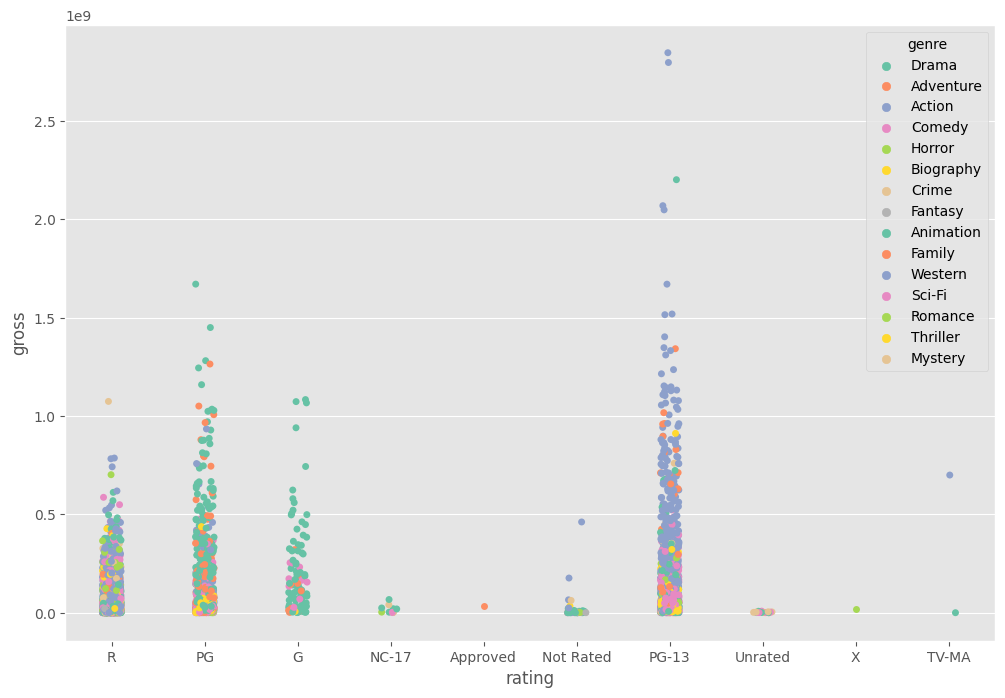

In [34]:
# by 'rating' and differenciating 'genre'

sns.stripplot(x="rating", y="gross", data=df, hue = 'genre', palette="Set2")

<Axes: xlabel='rating', ylabel='gross'>

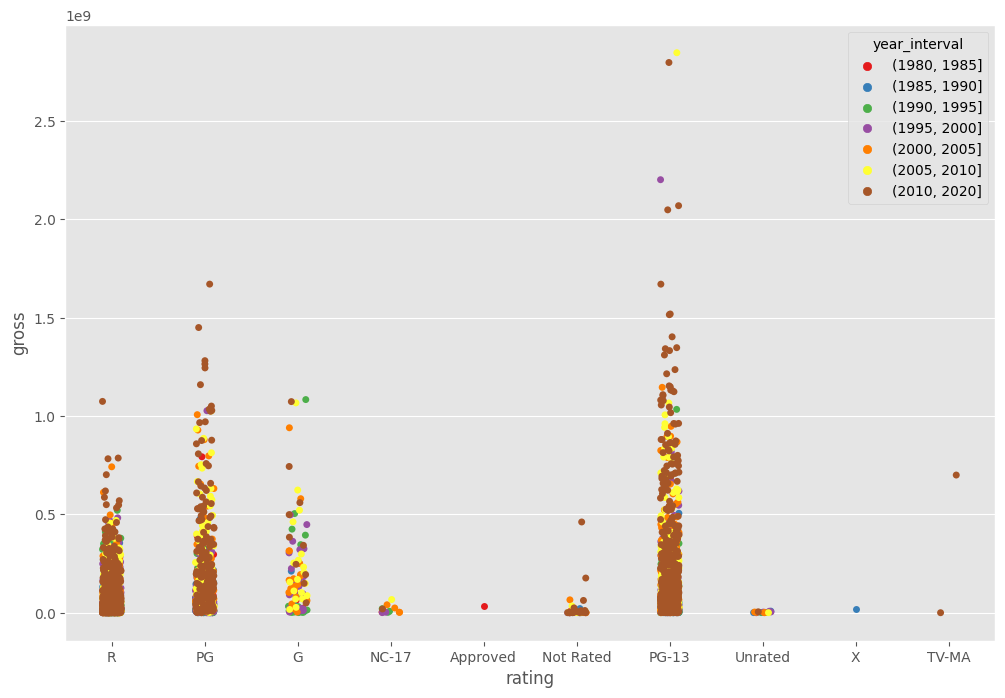

In [40]:
# By intervals of years and rating

bins = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2020]
df['year_interval'] = pd.cut(df['year_correct'], bins=bins)
sns.stripplot(x="rating", y="gross", data=df, hue = 'year_interval', palette="Set1")